# Linear Regression.
Linear Regression is a machine learning algorithm based on supervised learning.  It performs a regression task.  Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used. 
There are many names for a regression’s dependent variable.  It may be called an outcome variable, criterion variable, endogenous variable, or regressand. The independent variables can be called exogenous variables, predictor variables, or regressors.

Source: https://www.geeksforgeeks.org/ml-linear-regression/

The most common type of linear regression that we have encounterd in our life is $y = m*x + c$. This equation is used to predict the value of y at a value x given the slope of the line is m and the intercept or the point where the line intercepts the y axis is c

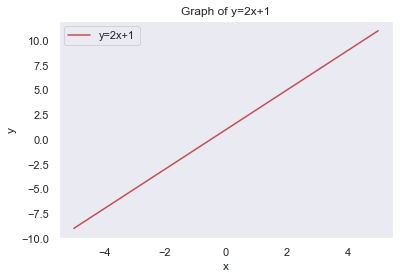

In the above example the slope on the line(m) is 2 and the intercept(c) is 1. Using this we can predict the value of the y for any value of x for the given equation.

In [1]:
# importing necessary lib to perform Linear Regression
import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression 
sns.set()

In [52]:
# creating a dataset of 1 feature(s) of 100 different samples
X, y = make_regression(n_samples=10000, 
                       n_features=1,
                       n_informative=1,
                       noise= 100,
                       random_state=100
)
print(X[:10])   #printing the first 10 features                       

[[-0.1646798 ]
 [ 1.68624028]
 [ 1.33953674]
 [-1.57775791]
 [ 1.36265167]
 [-0.17225781]
 [-0.50788915]
 [ 0.62322167]
 [-0.38095882]
 [-1.85950917]]


X is matrix of size m x n. Each Row(m) of the X is a different training example and column(n) represents the number of features in the training data. In our case the size of the training data will be (100, 1)

In [53]:
print(X.shape)
print(y.shape)

(10000, 1)
(10000,)


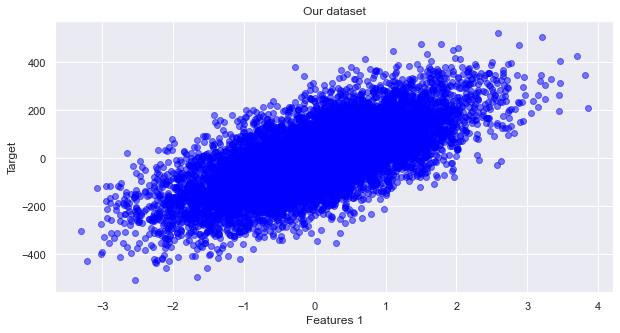

In [54]:
# Plotting the values on a graph 
def Figure(X,y):
    # create figure
    fig = plt.figure(figsize=(10, 5))
    # add subplot (rows, cols, number)
    ax = fig.add_subplot(1, 1, 1, xlabel='Features 1', ylabel='Target')
    # plot data on new axis
    ax.scatter(X,y, color='blue', alpha=0.5)
    ax.set_title('Our dataset')
    # display plot
    plt.show()

Figure(X,y)

# Bias Trick
The bias trick is used to reduce the calculations required. Doing a matrix multiplication and then adding a bias vector (left) is equivalent to adding a bias dimension with a constant of 1 to all input vectors and extending the weight matrix by 1 column – a bias column (right). Thus, if we preprocess our data by appending ones to all vectors we only have to learn a single matrix of weights instead of two matrices that hold the weights and the biases.

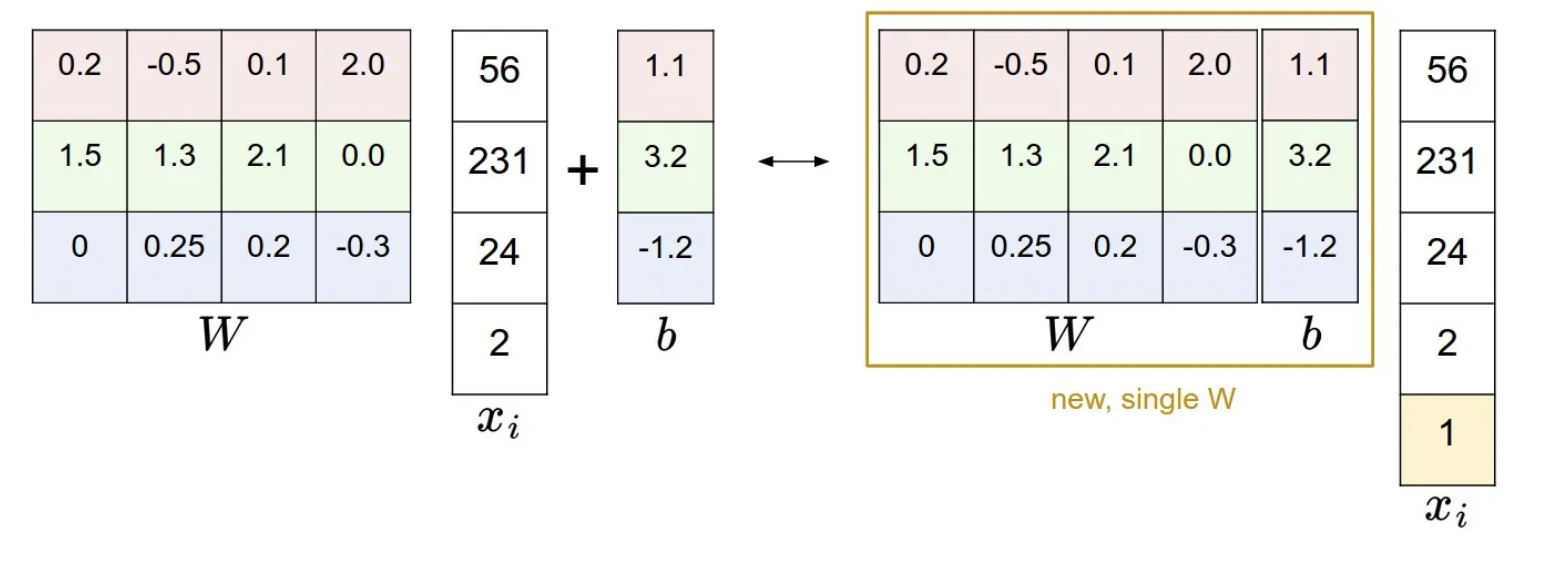

Ref: http://cs231n.github.io/linear-classify/

In [55]:
N = X.shape[0]
X_new = np.concatenate([np.ones((N, 1)), X], axis=1)
# Going forward this will be the matrix used for calculation

The Linear Regression Line for a single variable can be written as $y = \theta_0 + \theta_1 x_1$ and for problems with multiple variables the equation changes to $y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 ... + \theta_n x_n$ where $x_n$ is the number of features present in the model. To simplify the notation of the equation we can re write the equation in terms of the vector notation on the variables i.e vector notation $\vec \theta = [\theta_1, \theta_2, ...., \theta_n]$ 
$\vec x = [x_1, x_2, x_3, ...., x_n]$ which can be simplified to $h_{\theta}(x_i)$= $\theta^T \cdot \vec x+ b$= $\theta_0 + \theta_1 x_1 + \theta_2 x_2 ... + \theta_i$.

$\theta^T x$ is used to calculate the hypothesis for a single training example when X is a vector. In practice there is a very rare chance that your training data will only consist of a single training example. In case of multiple training examples, the training vector X will be a matrix of size m x n where is the number of training examples and n is the number of features.

$\theta$ has to be a n x 1 vector then when you do Matrix-Vector Multiplication $X \theta$ you will obtain an m x 1 vector with all your h(x)'s training examples in your training set (X matrix). Matrix multiplication will create the vector h(x) row by row making the corresponding math and this will be equal to the h(x) definition at each training example.

## Ordinary Least Square



OLS is a meathod of finding the co-efficients of the linear equation. The equation of the OLS is $\beta = (X^TX)^{-1}X^TY$. This equation is also know as the Normal Equation. 

In [56]:
def Hypothesis(X, y):
    beta = inv(X.T.dot(X)).dot(X.T).dot(y) 
    return X.dot(beta), beta

h_x, beta= Hypothesis(X_new, y)
print(beta)

[ 0.29219397 93.71007296]


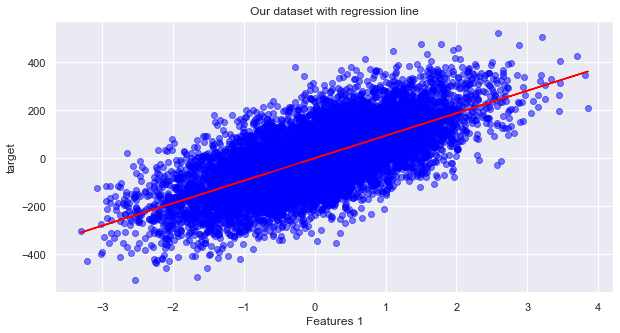

In [57]:
def Prediction(X, y):
    # create figure
    fig = plt.figure(figsize=(10, 5))
    # add subplot (rows, cols, number)
    ax = fig.add_subplot(1, 1, 1, xlabel='Features 1', ylabel='target')
    # plot data on new axis
    ax.scatter(X,y, color='blue', alpha=0.5)
    # plot regression line
    ax.plot(X, h_x, color='red')
    ax.set_title('Our dataset with regression line')
    # display plot
    plt.show()

Prediction(X, y)

Cost function is an important parameter that determines how well a machine learning model performs for a given dataset. It calculates the difference between the expected value and predicted value and represents it as a single real number.

In [58]:
def CostFunction(X, y, beta):
    return  (X.dot(beta) -y).dot(X.dot(beta) -y) /(2*X.shape[0])

cost_func = CostFunction(X_new, y, beta)
print('Cost: %.02f ' % (cost_func))

Cost: 5014.43 


In [59]:
def Mean_Square_Error(X, y, beta):
    return (X.dot(beta) - y).dot(X.dot(beta) - y)/ X.shape[0]

mse = Mean_Square_Error(X_new, y, beta)
print('MSE: %.02f RMSE: %.02f' % (mse, np.sqrt(mse)))

MSE: 10028.87 RMSE: 100.14


In [60]:
def AbsoluteError(X, y, beta):
    return np.sum(abs(X.dot(beta) - y)) / X.shape[0]

mae = AbsoluteError(X_new, y, beta)
print('MAE: %.02f' % (mae))

MAE: 79.99


In [61]:
def Gradient(X, y, beta):
    return (y - X.dot(beta)).dot(X) /X.shape[0]


print(norm(Gradient(X_new, y, beta)))

1.662135929589307e-14


In [62]:
def BGD(X, y, lr):
    N, D = X.shape
    theta = np.random.rand(D)

    losses  = [Mean_Square_Error(X, y, theta)]
    betas = [theta.copy()]

    cost = CostFunction(X, y, theta)

    itr = 1
    while True:
        y_pred = X.dot(theta)
        d_theta = Gradient(X, y, theta)
        theta_temp = theta + lr*d_theta
        
        loss = CostFunction(X, y, theta)
        
        losses.append(loss)
        betas.append(theta.copy())

        # Stopping Condition
        if np.sum(abs(theta_temp - theta)) < 1e-5:
            break
        
        if (itr % 10 == 0):
            print ("Iteration: %d - loss: %.4f "%(itr, loss))
        
        itr += 1
        theta = theta_temp

    print("Converged at Iteration: %d - loss: %.4f "%(itr, loss))
    return y_pred, np.array(losses), np.array(betas)
h_x , losses_BGD, betas = BGD(X_new, y, 1e-1)
print(betas[-1])

Iteration: 10 - loss: 5654.2071 
Iteration: 20 - loss: 5090.0602 
Iteration: 30 - loss: 5023.3729 
Iteration: 40 - loss: 5015.4898 
Iteration: 50 - loss: 5014.5580 
Iteration: 60 - loss: 5014.4478 
Iteration: 70 - loss: 5014.4348 
Iteration: 80 - loss: 5014.4332 
Iteration: 90 - loss: 5014.4331 
Iteration: 100 - loss: 5014.4330 
Iteration: 110 - loss: 5014.4330 
Iteration: 120 - loss: 5014.4330 
Converged at Iteration: 130 - loss: 5014.4330 
[ 0.29219569 93.70997596]


In [63]:
def SGD(X, y, lr):
    N, D = X.shape
    theta = np.random.rand(D)

    losses  = [Mean_Square_Error(X, y, theta)]
    betas = [theta.copy()]

    cost = CostFunction(X, y, theta)

    for i in range(N):
        y_pred = X.dot(theta)
        d_theta = Gradient(X, y, theta)
        theta_temp = theta + lr*d_theta
        
        loss = CostFunction(X, y, theta)
        
        losses.append(loss)
        betas.append(theta.copy())

        # Stopping Condition
        if np.sum(abs(theta_temp - theta)) < 1e-5:
            break
        
        if (i % 10 == 0):
            print ("Iteration: %d - loss: %.4f "%(i, loss))
        
        theta = theta_temp

    print("Converged at Iteration: %d - loss: %.4f "%(i, loss))    
    return y_pred, np.array(losses), np.array(betas)
h_x , losses_SGD, betas = SGD(X_new, y, 1e-1)
print(betas[-1])

Iteration: 0 - loss: 9411.9816 
Iteration: 10 - loss: 5534.2791 
Iteration: 20 - loss: 5075.8859 
Iteration: 30 - loss: 5021.6977 
Iteration: 40 - loss: 5015.2918 
Iteration: 50 - loss: 5014.5346 
Iteration: 60 - loss: 5014.4450 
Iteration: 70 - loss: 5014.4344 
Iteration: 80 - loss: 5014.4332 
Iteration: 90 - loss: 5014.4331 
Iteration: 100 - loss: 5014.4330 
Iteration: 110 - loss: 5014.4330 
Iteration: 120 - loss: 5014.4330 
Converged at Iteration: 130 - loss: 5014.4330 
[ 0.29219626 93.70998552]


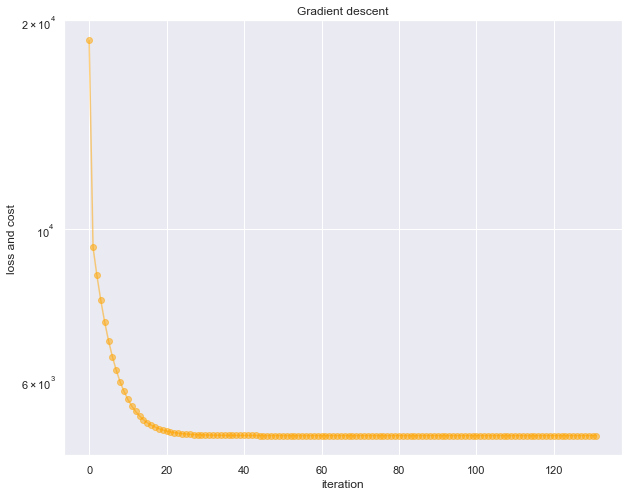

In [64]:
# create figure
fig = plt.figure(figsize=(10, 8))
# add subplot (rows, cols, number)
ax = fig.add_subplot(1, 1, 1, xlabel='iteration', ylabel='loss and cost')
# plot data on new axis
#ax.plot(losses_BGD , color='blue', marker='x', alpha=0.5)
ax.plot(losses_SGD, color='orange', marker='o', alpha=0.5)

ax.set_title('Gradient descent')
ax.set_yscale('log')
# display plot
plt.show()

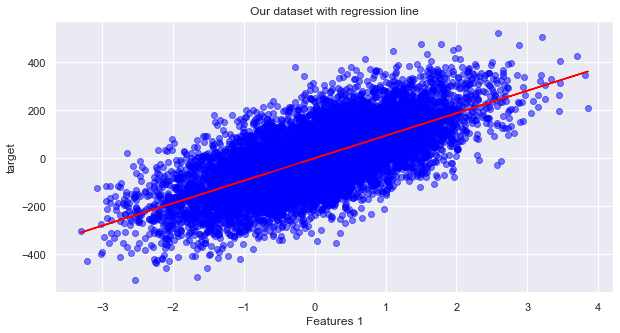

In [65]:
Prediction(X, y)

Iteration: 10 - loss: 9146.3945 
Iteration: 20 - loss: 8902.4585 
Iteration: 30 - loss: 8672.9236 
Iteration: 40 - loss: 8456.9397 
Iteration: 50 - loss: 8253.7066 
Iteration: 60 - loss: 8062.4717 
Iteration: 70 - loss: 7882.5266 
Iteration: 80 - loss: 7713.2049 
Iteration: 90 - loss: 7553.8792 
Iteration: 100 - loss: 7403.9596 
Iteration: 110 - loss: 7262.8907 
Iteration: 120 - loss: 7130.1501 
Iteration: 130 - loss: 7005.2459 
Iteration: 140 - loss: 6887.7156 
Iteration: 150 - loss: 6777.1239 
Iteration: 160 - loss: 6673.0612 
Iteration: 170 - loss: 6575.1419 
Iteration: 180 - loss: 6483.0034 
Iteration: 190 - loss: 6396.3045 
Iteration: 200 - loss: 6314.7239 
Iteration: 210 - loss: 6237.9595 
Iteration: 220 - loss: 6165.7271 
Iteration: 230 - loss: 6097.7590 
Iteration: 240 - loss: 6033.8034 
Iteration: 250 - loss: 5973.6236 
Iteration: 260 - loss: 5916.9966 
Iteration: 270 - loss: 5863.7126 
Iteration: 280 - loss: 5813.5743 
Iteration: 290 - loss: 5766.3960 
Iteration: 300 - loss: 

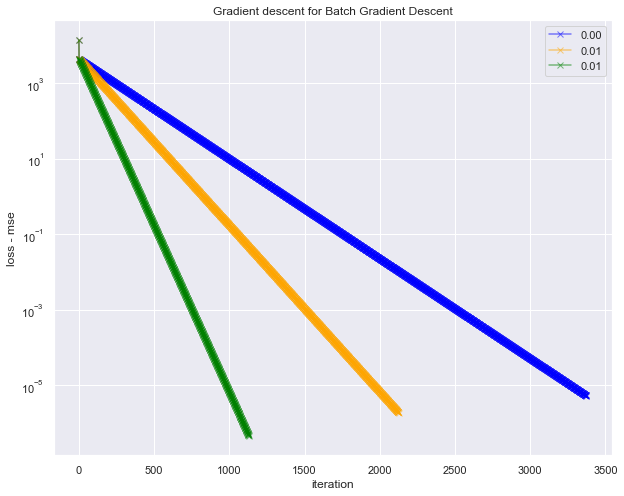

In [68]:
from numpy.linalg import eigvals
eigens = eigvals(X_new.T.dot(X_new) / X_new.shape[0])

lr = [0.003, 0.005, 0.01]
h_x , losses_1, betas = BGD(X_new, y, lr[0])
h_x , losses_2, betas = BGD(X_new, y, lr[1])
h_x , losses_3, betas = BGD(X_new, y, lr[2])

print("Highest and lowest of loss - cost fucntion at lr {} is".format(lr[0]), max(losses_1 - cost_func), min(losses_1 - cost_func))
print("Highest and lowest of loss - cost fucntion at lr {} is".format(lr[1]), max(losses_2 - cost_func), min(losses_2 - cost_func))
print("Highest and lowest of loss - cost fucntion at lr {} is".format(lr[2]), max(losses_3 - cost_func), min(losses_3 - cost_func))
# create figure
fig = plt.figure(figsize=(10, 8))
# add subplot (rows, cols, number)
ax = fig.add_subplot(1, 1, 1, xlabel='iteration', ylabel='loss - mse')
# plot data on new axis
ax.plot(losses_1 - cost_func, color='blue', marker='x', alpha=0.5, label='%.02f' % lr[0])
ax.plot(losses_2 - cost_func, color='orange', marker='x', alpha=0.5, label='%.02f' % lr[1])
ax.plot(losses_3 - cost_func, color='green', marker='x', alpha=0.5, label='%.02f' % lr[2])


ax.set_title('Gradient descent for Batch Gradient Descent')
ax.set_yscale('log')
plt.legend()
# display plot
plt.show()

Iteration: 0 - loss: 9380.2455 
Iteration: 10 - loss: 8576.1700 
Iteration: 20 - loss: 7920.1857 
Iteration: 30 - loss: 7385.0177 
Iteration: 40 - loss: 6948.4145 
Iteration: 50 - loss: 6592.2230 
Iteration: 60 - loss: 6301.6332 
Iteration: 70 - loss: 6064.5630 
Iteration: 80 - loss: 5871.1552 
Iteration: 90 - loss: 5713.3683 
Iteration: 100 - loss: 5584.6419 
Iteration: 110 - loss: 5479.6238 
Iteration: 120 - loss: 5393.9473 
Iteration: 130 - loss: 5324.0503 
Iteration: 140 - loss: 5267.0266 
Iteration: 150 - loss: 5220.5053 
Iteration: 160 - loss: 5182.5520 
Iteration: 170 - loss: 5151.5887 
Iteration: 180 - loss: 5126.3281 
Iteration: 190 - loss: 5105.7199 
Iteration: 200 - loss: 5088.9072 
Iteration: 210 - loss: 5075.1910 
Iteration: 220 - loss: 5064.0009 
Iteration: 230 - loss: 5054.8718 
Iteration: 240 - loss: 5047.4240 
Iteration: 250 - loss: 5041.3479 
Iteration: 260 - loss: 5036.3909 
Iteration: 270 - loss: 5032.3468 
Iteration: 280 - loss: 5029.0476 
Iteration: 290 - loss: 50

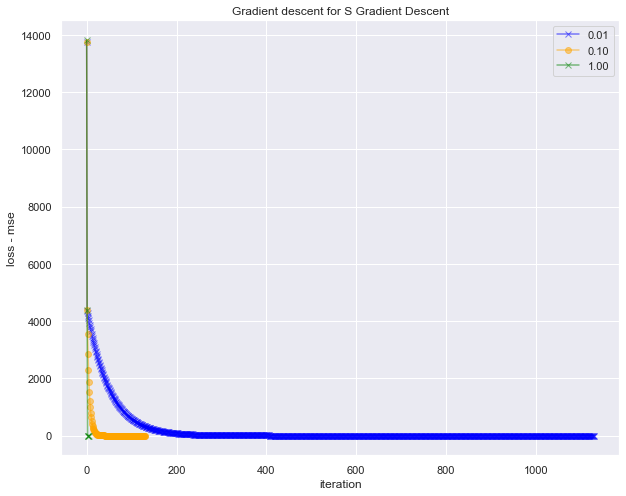

In [69]:
from numpy.linalg import eigvals
eigens = eigvals(X_new.T.dot(X_new) / X_new.shape[0])

lr = [1e-2, 1e-1, 1]
h_x , losses_1, betas = SGD(X_new, y, lr[0])
h_x , losses_2, betas = SGD(X_new, y, lr[1])
h_x , losses_3, betas = SGD(X_new, y, lr[2])

print("Highest and lowest of loss - cost fucntion at lr {} is".format(lr[0]), max(losses_1 - cost_func), min(losses_1 - cost_func))
print("Highest and lowest of loss - cost fucntion at lr {} is".format(lr[1]), max(losses_2 - cost_func), min(losses_2 - cost_func))
print("Highest and lowest of loss - cost fucntion at lr {} is".format(lr[2]), max(losses_3 - cost_func), min(losses_3 - cost_func))
# create figure
fig = plt.figure(figsize=(10, 8))
# add subplot (rows, cols, number)
ax = fig.add_subplot(1, 1, 1, xlabel='iteration', ylabel='loss - mse')
# plot data on new axis
ax.plot(losses_1 - cost_func, color='blue', marker='x', alpha=0.5, label='%.02f' % lr[0])
ax.plot(losses_2 - cost_func, color='orange', marker='o', alpha=0.5, label='%.02f' % lr[1])
ax.plot(losses_3 - cost_func, color='green', marker='x', alpha=0.5, label='%.02f' % lr[2])


ax.set_title('Gradient descent for S Gradient Descent')
plt.legend()
# display plot
plt.show()